In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('data.csv', delimiter=',')
nan_rows = np.isnan(data).any(axis=1)
data = data[~nan_rows]
state = data[:, 4]
angular = data[:, 3]
speed = data[:, 2]
indices_roam = np.where(state == 1)
angular_roam = angular[indices_roam]
speed_roam = speed[indices_roam]
indices_dwell = np.where(state == 0)
angular_dwell = angular[indices_dwell]
speed_dwell = speed[indices_dwell]

indices = np.where(angular_roam < 30)
angular_roam = angular_roam[indices]
speed_roam = speed_roam[indices]

indices = np.where(angular_dwell > 100)
angular_dwell = angular_dwell[indices]
speed_dwell = speed_dwell[indices]

data_roam = np.stack((angular_roam, speed_roam), axis=1)
data_dwell = np.stack((angular_dwell, speed_dwell), axis=1)

In [3]:
mean_roam = np.mean(data_roam, axis=0)
mean_dwell = np.mean(data_dwell, axis=0)
cov_roam = np.zeros([2, 2])
cov_dwell = np.zeros([2, 2])
for x in data_roam:
    cov_roam += (x - mean_roam).reshape([-1, 1]) * (x - mean_roam)
cov_roam /= len(data_roam)
for x in data_dwell:
    cov_dwell += (x - mean_dwell).reshape([-1, 1]) * (x - mean_dwell)
cov_dwell /= len(data_dwell)

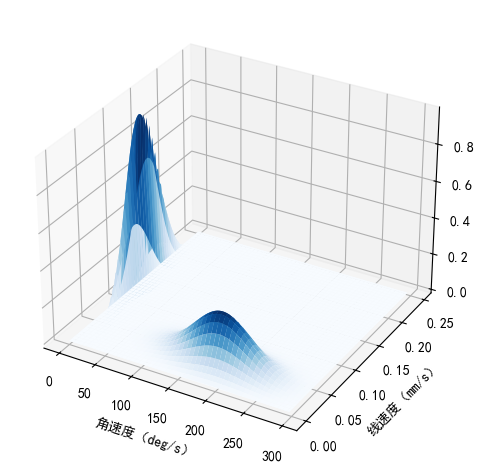

In [32]:
from scipy.stats import multivariate_normal
from matplotlib import cm

plt.rcParams['font.sans-serif'] = ['SimHei']
dist_roam = multivariate_normal(mean_roam, cov_roam)
dist_dwell = multivariate_normal(mean_dwell, cov_dwell)

x1 = np.arange(0, 300, 3)
y1 = np.arange(0, 0.25, 0.0025)
x1, y1 = np.meshgrid(x1, y1)
z1 = dist_roam.pdf(np.column_stack((x1.ravel(), y1.ravel()))).reshape(x1.shape)

x2 = np.arange(0, 300, 3)
y2 = np.arange(0, 0.25, 0.0025)
x2, y2 = np.meshgrid(x2, y2)
z2 = dist_dwell.pdf(np.column_stack((x2.ravel(), y2.ravel()))).reshape(x2.shape)

# Plot the surface
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12, 5], subplot_kw={"projection": "3d"})
fig, ax1 = plt.subplots(subplot_kw={"projection": "3d"})
ax1.plot_surface(x1, y1, z1, cmap=cm.Blues)
# ax2.contourf(x1, y1, z1, levels=levels, cmap='viridis')
ax1.plot_surface(x2, y2, z2, cmap=cm.Blues)
ax1.set_xlabel('角速度（deg/s）')
ax1.set_ylabel('线速度（mm/s）')
# ax1.set_xticklabels([])
# ax1.set_yticklabels([])
# ax1.set_zticklabels([])
# ax2.set_xticklabels([])
# ax2.set_yticklabels([])
# ax2.set_zticklabels([])
plt.tight_layout()
plt.show()

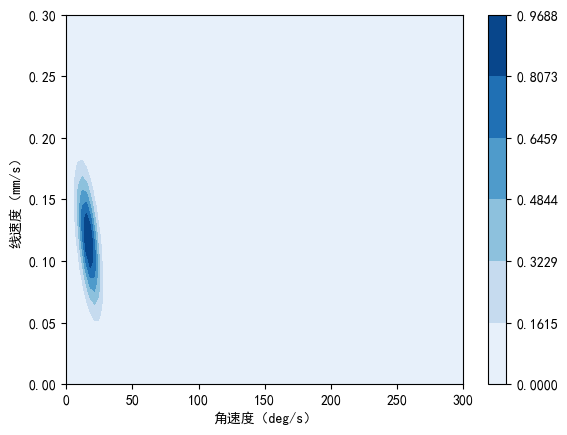

In [47]:
x1, y1 = np.meshgrid(np.linspace(0, 300, 100), np.linspace(0, 0.3, 100))
z1 = dist_roam.pdf(np.column_stack((x1.ravel(), y1.ravel()))).reshape(x1.shape)
levels1 = np.linspace(np.min(z1), np.max(z1), 7)

fig, ax1 = plt.subplots()
cs = ax1.contourf(x1, y1, z1, levels=levels1, cmap=cm.Blues)

ax1.set_xlabel('角速度（deg/s）')
ax1.set_ylabel('线速度（mm/s）')
cbar = fig.colorbar(cs)
plt.show()

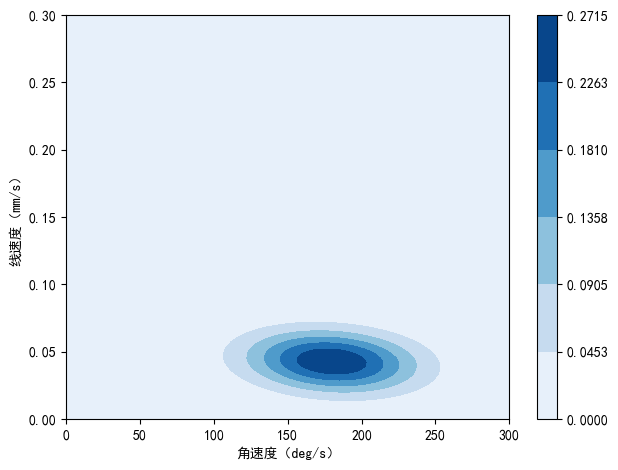

In [46]:
x2, y2 = np.meshgrid(np.linspace(0, 300, 100), np.linspace(0, 0.3, 100))
z2 = dist_dwell.pdf(np.column_stack((x2.ravel(), y2.ravel()))).reshape(x2.shape)
levels2 = np.linspace(np.min(z2), np.max(z2), 7)

fig, ax2 = plt.subplots()
cs2 = ax2.contourf(x2, y2, z2, levels=levels2, cmap=cm.Blues)
ax2.set_xlabel('角速度（deg/s）')
ax2.set_ylabel('线速度（mm/s）')
cbar = fig.colorbar(cs2)
plt.tight_layout()
plt.show()

In [6]:
print(mean_roam, sep=',')
print(mean_dwell, sep=',')

print(cov_roam, sep=',')
print(cov_dwell, sep=',')

[16.80526863  0.11663735]
[1.79725427e+02 4.28807042e-02]
[[ 3.14002146e+01 -1.08002093e-01]
 [-1.08002093e-01  1.18060633e-03]]
[[ 1.49774232e+03 -8.79897963e-02]
 [-8.79897963e-02  2.34201939e-04]]
